<a href="https://colab.research.google.com/github/kavyakalivarapu-lab/ML-project/blob/main/sm_sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1='/content/drive/MyDrive/ML/sem_project/Train.csv'
path2='/content/drive/MyDrive/ML/sem_project/Test.csv'
train=pd.read_csv(path1)
test=pd.read_csv(path2)

In [4]:
train.shape

(2000, 3)

In [5]:
train.dtypes

,0
Id,int64
Body,object
Sentiment Type,object


In [6]:
train.isnull().sum()

,0
Id,0
Body,228
Sentiment Type,0


In [10]:
train.dropna(inplace=True)

In [11]:
train.isnull().sum()

,0
Id,0
Body,0
Sentiment Type,0


In [7]:
test.shape

(2000, 2)

In [8]:
test.dtypes

,0
Id,int64
Body,object


In [9]:
test.isnull().sum()

,0
Id,0
Body,228


In [12]:
test.dropna(inplace=True)

In [13]:
test.isnull().sum()

,0
Id,0
Body,0


In [14]:
train.drop(['Id'],axis=1,inplace=True)

In [15]:
train.shape

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
2,no politics danger now i can make a propaganda...,negative
3,i am the senate gets stabbed,neutral
4,is this a suicide,neutral
5,removed,neutral


In [16]:
test.drop(['Id'],axis=1,inplace=True)

In [17]:
test.head()

,Body
0,rule 2 no metes about polarizing political top...
2,no politics danger now i can make a propaganda...
3,i am the senate gets stabbed
4,is this a suicide
5,removed


In [21]:
train.rename(columns={'Body':'Tweets','Sentiment Type':'Target'},inplace=True),test.rename(columns={'Body':'Tweets','Sentiment Type':'Target'},inplace=True)

(None, None)

In [23]:
train.head(),test.head()

(                                              Tweets    Target
 0  rule 2 no metes about polarizing political top...   neutral
 2  no politics danger now i can make a propaganda...  negative
 3                       i am the senate gets stabbed   neutral
 4                                  is this a suicide   neutral
 5                                            removed   neutral,
                                               Tweets
 0  rule 2 no metes about polarizing political top...
 2  no politics danger now i can make a propaganda...
 3                       i am the senate gets stabbed
 4                                  is this a suicide
 5                                            removed)

In [22]:
train['Target'].value_counts()

,count
Target,
neutral,782
positive,632
negative,358


In [24]:
import re
import nltk
!pip install emoji
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import unicodedata
from bs4 import BeautifulSoup


#downloading NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [39]:
def clean_text(text):
 # Convert to string, lower case, and strip whitespace
  text = str(text).lower().strip()

    # Replace specific symbols
  text = text.replace('%', 'percent').replace('$', 'dollar')

    # Remove emojis
  text = emoji.replace_emoji(text, replace='')

    # Replace large numbers with abbreviations
  text = re.sub(r'(\d{1,3}(?:,\d{3})*)', lambda x: format_large_number(x.group(0)), text)

    # Remove unwanted characters
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  text = re.sub(r'<[^>]*>', ' ', text)  # Remove HTML tags

    # Handle contractions
  contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "could've": "could have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "isn't": "is not",
        "it's": "it is",
        "I'm": "I am",
        "you're": "you are",
        "they're": "they are"
    }

    # Decontract words
  text_decontracted = [contractions.get(word, word) for word in text.split()]
  text = ' '.join(text_decontracted)

    # Normalize the text
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Remove HTML tags
  text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove stop words and lemmatize
  text = ' '.join(word for word in text.split() if word not in stop_words)
  text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

  return text
def format_large_number(num_str):
  num_str = num_str.replace(',', '')
  num = int(num_str)
  if num >= 1_000_000_000:
    return f'{num // 1_000_000_000}b'
  elif num >= 1_000_000:
    return f'{num // 1_000_000}m'
  elif num >= 1_000:
    return f'{num // 1_000}k'
  return num_str

In [40]:
train["cleaned_Tweet"]=train["Tweets"].apply(clean_text)

In [41]:
print("Cleaned text in training data:")
train[['Tweets','cleaned_Tweet']].head()

Cleaned text in training data:


,Tweets,cleaned_Tweet
0,rule 2 no metes about polarizing political top...,rule mete polarizing political topic vulnerabl...
2,no politics danger now i can make a propaganda...,politics danger make propaganda meme telling p...
3,i am the senate gets stabbed,senate get stabbed
4,is this a suicide,suicide
5,removed,removed


In [42]:
test["cleaned_Tweet"]=test["Tweets"].apply(clean_text)
print("cleaned text in test data:")
test[['Tweets','cleaned_Tweet']].head()



cleaned text in test data:


,Tweets,cleaned_Tweet
0,rule 2 no metes about polarizing political top...,rule mete polarizing political topic vulnerabl...
2,no politics danger now i can make a propaganda...,politics danger make propaganda meme telling p...
3,i am the senate gets stabbed,senate get stabbed
4,is this a suicide,suicide
5,removed,removed


**Data Visualization**

<ipython-input-47-49e4560375bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=train,x='Target',palette='coolwarm')


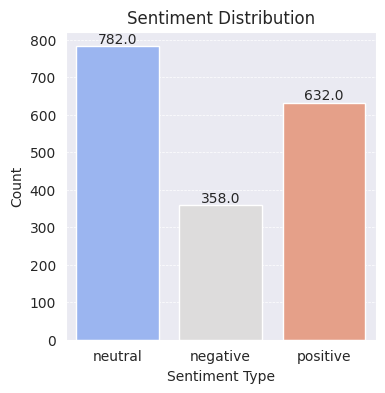

In [47]:
plt.figure(figsize=(4,4))
sns.set_style("darkgrid")
ax=sns.countplot(data=train,x='Target',palette='coolwarm')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.grid(axis='y',linestyle='--',linewidth=0.5)
plt.show()

Largest Tweet Lengths [525 518 504 481 472 453 423 365 347 332 321 316 314 313 302 301 293 279
 276 272 268 266 262 259 255 253 244]


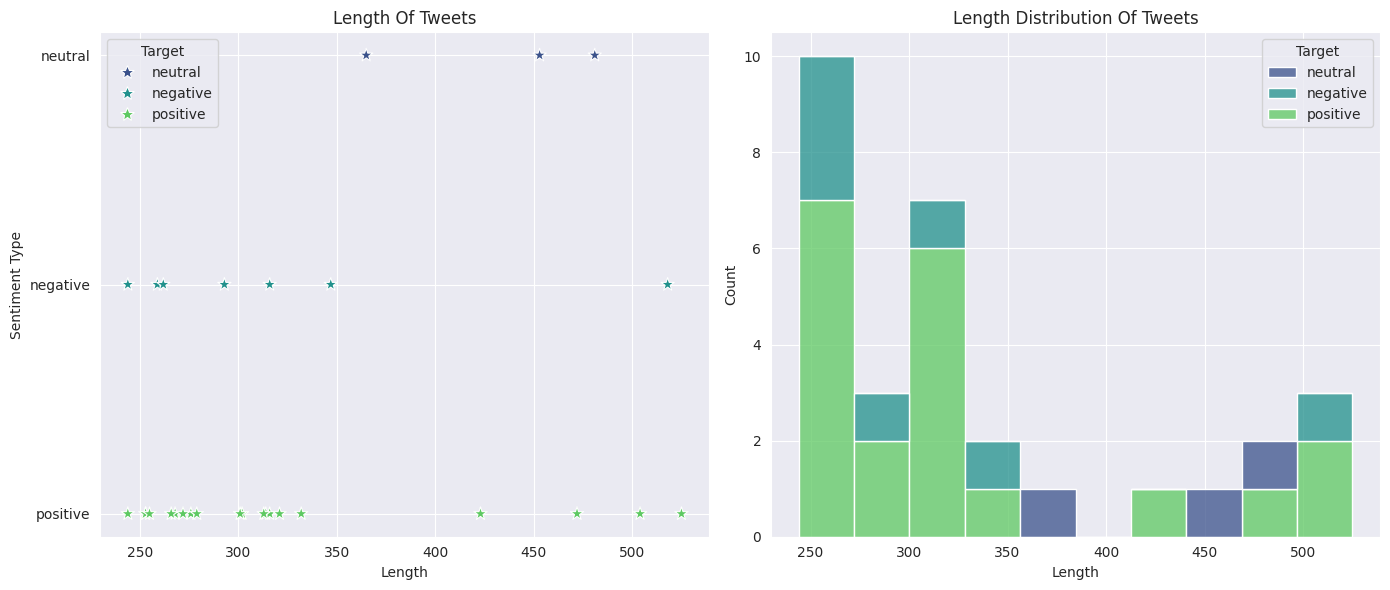

In [58]:
largest_tweet_len=train['cleaned_Tweet'].str.len().nlargest(30).unique()
filtered_data=train[train['cleaned_Tweet'].str.len().isin(largest_tweet_len)]
print("Largest Tweet Lengths",largest_tweet_len)
fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.scatterplot(x=filtered_data['cleaned_Tweet'].str.len(),y=filtered_data['Target']
                ,ax=axes[0],hue=train['Target'],palette='viridis',marker='*',s=100)
axes[0].set_title("Length Of Tweets")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Sentiment Type")

sns.histplot(x=filtered_data['cleaned_Tweet'].str.len(),ax=axes[1],hue=train['Target'],
             multiple='stack',bins=10,palette='viridis')
axes[1].set_title("Length Distribution Of Tweets")
axes[1].set_xlabel("Length")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()